# 1주차 심화과제 - plot1
# MNIST 예측 모델에 deep learning techniques 적용하기

GPU를 설정했으면 library들을 import합니다.

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms



#  CIFAR10의 입력 shape 확인
    - CIFAR10은 MNIST와 다른 입력 shape을 가지고 있습니다.
    - 입력 shape은 model을 선언할 때 중요하기 때문에 MNIST 실습 자료에서 사용한 방식과 똑같이 shape을 확인해주시면 됩니다.


In [3]:
transform = transforms.ToTensor()

# MNIST에서 CIFAR10으로 변경
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)


100%|██████████| 170498071/170498071 [00:03<00:00, 49480298.35it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


MNIST는 손글씨 사진과 어떤 숫자를 의미하는지에 대한 label의 pair들로 구성되어있습니다.
이 때, 우리는 PyTorch model을 사용할 것이기 때문에 손글씨 사진들을 모두 tensor로 변환해야합니다.
이러한 부가적인 변환들은 `torchvision.transforms`에서 제공하고 있으며, `torchvision.datasets.MNIST`에서 `transform` 인자로 받을 수 있습니다.
우리는 단순히 사진을 tensor로 바꾸고 싶기 때문에 `transforms.ToTensor()` transformation을 넘겨줍니다.

다음은 전체 data의 개수와 첫 번째 data를 출력한 결과입니다.

50000
torch.Size([3, 32, 32]) 6


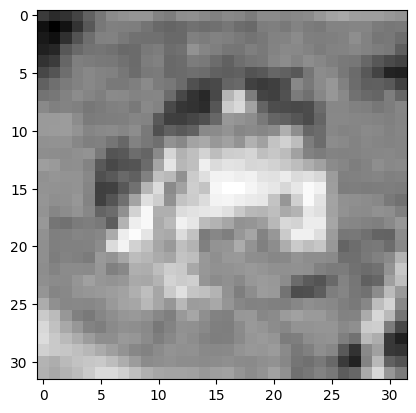

In [4]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

# Dataset 및 activation 함수 변경
    - Dataset을 MNIST에서 [CIFAR10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)으로 변경해줍니다.
    - Activation 함수를 `nn.ReLU`에서 `nn.LeakyReLU`로 변경해줍니다.
    - 학습 인자는 `n_epochs` = 50, `batch_size` = 256로 설정합니다.

In [5]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)


PyTorch에서는 `DataLoader`가 dataset을 인자로 받아 batch로 나눠줍니다.
부가적으로 `batch_size`라는 인자를 통해 batch size를 받고 있으며, `shuffle`이라는 인자를 통해 data들을 섞을지 결정해줍니다.
우리는 SGD가 완전 랜덤으로 batch를 구성해야 잘 동작하는 것을 알고 있기 때문에 `shuffle`에 `True`를 넘겨주고 있습니다.

다음은 첫 번째 batch를 출력한 모습입니다.

In [6]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)


torch.Size([256, 3, 32, 32]) torch.Size([256])


# Activation 함수를 `nn.ReLU`에서 `nn.LeakyReLU`로 변경해줍니다.


In [7]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    #nn.ReLU에서 nn.LeakyReLU로 변경
    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x


model1 = Model(32 * 32 * 3, 128)
model2 = Model(32 * 32 * 3, 128)

#  SGD와 Adam 성능 비교
    - 먼저 [Adam optimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)을 사용하여 학습하는 코드를 구현합니다.
    - (Plot 1) SGD와 Adam을 학습시킨 후 각각의 epoch에 대한 train 정확도를 plot합니다.

In [8]:
from torch.optim import SGD,Adam

lr = 0.001

model1 = model1.to('cuda')
model2 = model2.to('cuda')

optimizer_sgd = SGD(model1.parameters(), lr=lr)
optimizer_adam = Adam(model2.parameters(), lr=lr)

이전 코드와 거의 똑같습니다. 다른 점은 `model.to('cuda')` 코드를 통해 우리가 구현한 model을 GPU로 옮긴 것입니다.
MNIST 부터는 모델과 data가 커지면서 훨씬 많은 행렬 연산이 이루어지기 때문에 GPU를 활용하는 것이 빠릅니다.

다음은 model을 MNIST에 학습하는 코드입니다.

Epoch   0 | SGD Accuracy: 0.2252 | Adam Accuracy: 0.5257
Epoch   1 | SGD Accuracy: 0.2297 | Adam Accuracy: 0.5181
Epoch   2 | SGD Accuracy: 0.2332 | Adam Accuracy: 0.5397
Epoch   3 | SGD Accuracy: 0.2355 | Adam Accuracy: 0.5466
Epoch   4 | SGD Accuracy: 0.2390 | Adam Accuracy: 0.5430
Epoch   5 | SGD Accuracy: 0.2438 | Adam Accuracy: 0.5526
Epoch   6 | SGD Accuracy: 0.2466 | Adam Accuracy: 0.5551
Epoch   7 | SGD Accuracy: 0.2489 | Adam Accuracy: 0.5449
Epoch   8 | SGD Accuracy: 0.2570 | Adam Accuracy: 0.5697
Epoch   9 | SGD Accuracy: 0.2589 | Adam Accuracy: 0.5848
Epoch  10 | SGD Accuracy: 0.2609 | Adam Accuracy: 0.5693
Epoch  11 | SGD Accuracy: 0.2638 | Adam Accuracy: 0.5682
Epoch  12 | SGD Accuracy: 0.2654 | Adam Accuracy: 0.5774
Epoch  13 | SGD Accuracy: 0.2694 | Adam Accuracy: 0.5826
Epoch  14 | SGD Accuracy: 0.2722 | Adam Accuracy: 0.5976
Epoch  15 | SGD Accuracy: 0.2754 | Adam Accuracy: 0.5942
Epoch  16 | SGD Accuracy: 0.2773 | Adam Accuracy: 0.5889
Epoch  17 | SGD Accuracy: 0.282

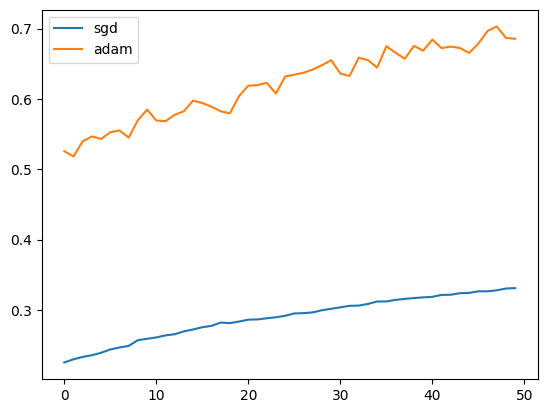

In [11]:
import numpy as np

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='sgd', label2='adam'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()


n_epochs = 50
train_accs_sgd = []
train_accs_adam = []

for epoch in range(n_epochs):
  total_train_loss_sgd = 0.
  total_train_loss_adam = 0.

  for data in trainloader:

    # SGD 모델 학습
    model1.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model1(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer_sgd.step()
    total_train_loss_sgd += loss.item()

    # Adam 모델 학습
    model2.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model2(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer_adam.step()
    total_train_loss_adam += loss.item()

  acc_sgd = accuracy(model1, trainloader)
  acc_adam = accuracy(model2, trainloader)

  train_accs_sgd.append(acc_sgd)
  train_accs_adam.append(acc_adam)


  print(f"Epoch {epoch:3d} | SGD Accuracy: {acc_sgd:.4f} | Adam Accuracy: {acc_adam:.4f}")

plot_acc(train_accs_sgd, train_accs_adam)



출력 결과를 보면 잘 수렴하는 것을 볼 수 있습니다.
이전 구현과 다른 점은 다음 두 가지입니다.
- `for data in trainloader`를 통해 batch들을 iterate하면서 model을 학습합니다.
- `inputs, labels = inputs.to('cuda'), labels.to('cuda')`를 통해 model의 입력으로 들어가는 tensor들을 GPU로 보냅니다.

마지막으로 첫 번째 data에 대한 예측 결과를 살펴봅시다.

In [ ]:
idx = 0

x = trainset[idx][0][None]  # (1, 1, 28, 28)
x = x.to('cuda')

print(model(x))
print(trainset[idx][1])

여기서 idx를 조정하여 다른 data에 대한 출력 결과도 볼 수 있습니다.
예측 결과를 보시면 아직 성능이 그렇게 좋지 않은 것을 알 수 있습니다.